<a href="https://colab.research.google.com/github/MDRobiulhassan/Machine-Learning-Course/blob/main/Student_Perfomence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/University/7th Semester/MLL/colab/student_lifestyle_100k.csv')

In [3]:
df.head()

,Student_ID,Age,Gender,Department,CGPA,Sleep_Duration,Study_Hours,Social_Media_Hours,Physical_Activity,Stress_Level,Depression
0,1001,22,Female,Science,3.50,7.3,3.3,3.4,114,5,False
1,1002,20,Male,Engineering,2.72,5.5,7.2,6.0,142,2,False
2,1003,20,Male,Medical,3.01,5.4,2.3,1.8,137,3,False
3,1004,21,Male,Engineering,3.63,8.1,2.0,4.6,130,3,False
4,1005,19,Male,Arts,3.14,6.8,2.6,4.3,4,6,False


In [4]:
df = df.drop('Student_ID', axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Age                 100000 non-null  int64  
 1   Gender              100000 non-null  object 
 2   Department          100000 non-null  object 
 3   CGPA                100000 non-null  float64
 4   Sleep_Duration      100000 non-null  float64
 5   Study_Hours         100000 non-null  float64
 6   Social_Media_Hours  100000 non-null  float64
 7   Physical_Activity   100000 non-null  int64  
 8   Stress_Level        100000 non-null  int64  
 9   Depression          100000 non-null  bool   
dtypes: bool(1), float64(4), int64(3), object(2)
memory usage: 7.0+ MB


In [6]:
df.shape

(100000, 10)

In [7]:
df.isnull().sum()

,0
Age,0
Gender,0
Department,0
CGPA,0
Sleep_Duration,0
Study_Hours,0
Social_Media_Hours,0
Physical_Activity,0
Stress_Level,0
Depression,0


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe()

,Age,CGPA,Sleep_Duration,Study_Hours,Social_Media_Hours,Physical_Activity,Stress_Level
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,21.009010,2.898316,6.996425,4.509517,3.503288,74.353180,4.131660
std,2.000382,0.532240,1.498682,1.976076,1.486852,43.366963,1.424151
min,18.000000,1.560000,3.000000,0.000000,0.000000,0.000000,2.000000
25%,19.000000,2.450000,6.000000,3.200000,2.500000,37.000000,3.000000
50%,21.000000,2.900000,7.000000,4.500000,3.500000,74.000000,4.000000
75%,23.000000,3.350000,8.000000,5.800000,4.500000,112.000000,5.000000
max,24.000000,4.000000,12.000000,12.800000,10.000000,149.000000,10.000000


In [10]:
import pandas as pd

outlier_summary = []

# Select numeric columns only
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_count = ((df[col] < lower) | (df[col] > upper)).sum()

    if outlier_count > 0:
        outlier_summary.append({
            'feature': col,
            'Q1': Q1,
            'Q3': Q3,
            'lower_bound': lower,
            'upper_bound': upper,
            'outlier_count': outlier_count
        })

outlier_df = pd.DataFrame(outlier_summary)
outlier_df

,feature,Q1,Q3,lower_bound,upper_bound,outlier_count
0,Sleep_Duration,6.0,8.0,3.0,11.0,369
1,Study_Hours,3.2,5.8,-0.7,9.7,432
2,Social_Media_Hours,2.5,4.5,-0.5,7.5,328
3,Stress_Level,3.0,5.0,0.0,8.0,478


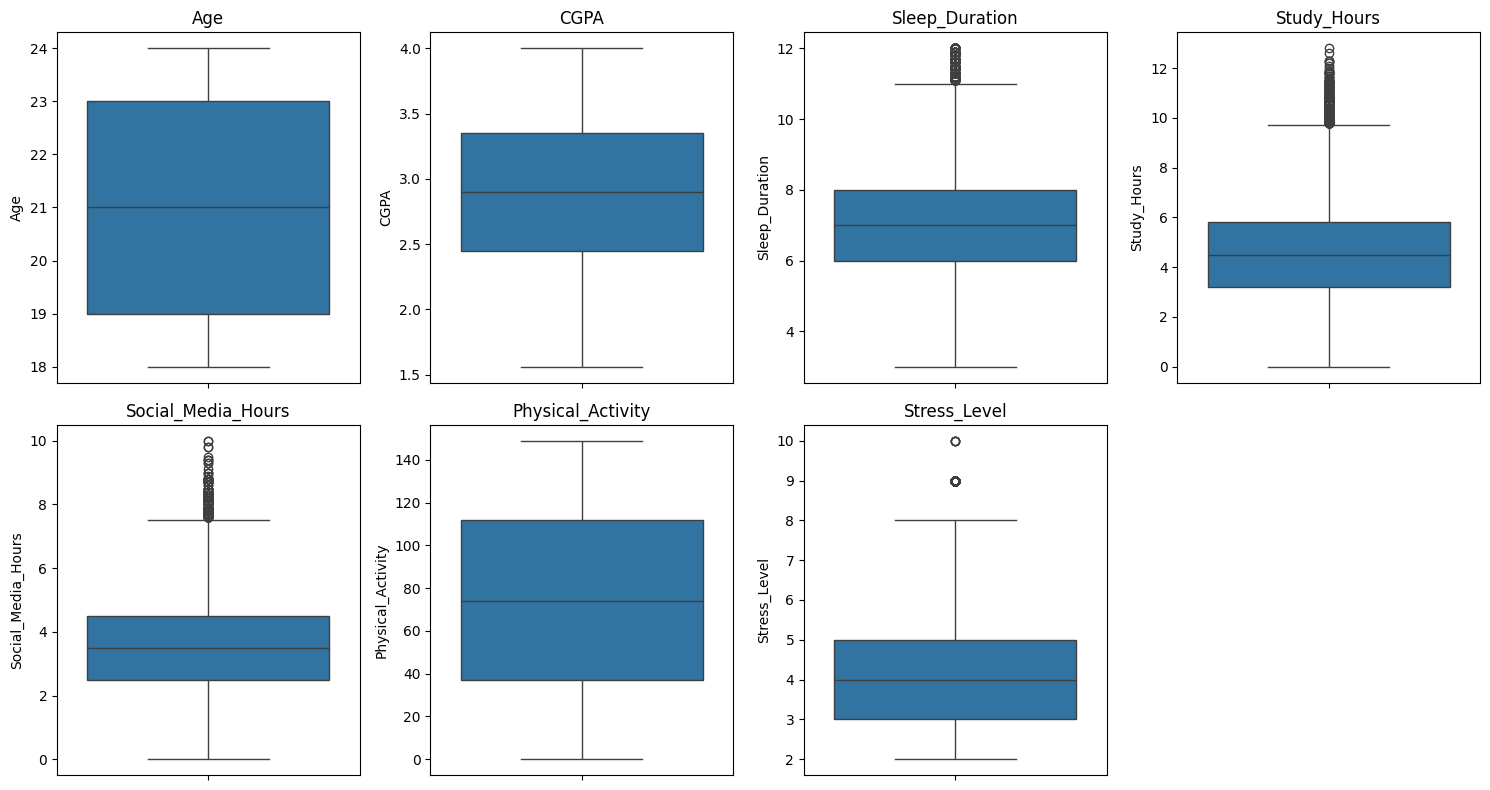

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Set figure size
plt.figure(figsize=(15, 8))

# Loop over numeric columns and plot
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 4, i)  # 2 rows, 4 columns layout
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [12]:
# Columns with detected outliers
outlier_cols = ['Sleep_Duration', 'Study_Hours', 'Social_Media_Hours', 'Stress_Level']

for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Clip values outside bounds
    df[col] = df[col].clip(lower, upper)

In [13]:

capped_summary = []

for feature in numeric_cols:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    capped_summary.append([feature, Q1, Q3, lower, upper, 0])

capped_df = pd.DataFrame(capped_summary, columns=['feature','Q1','Q3','lower_bound','upper_bound','outlier_count'])

capped_df

,feature,Q1,Q3,lower_bound,upper_bound,outlier_count
0,Age,19.00,23.00,13.0,29.0,0
1,CGPA,2.45,3.35,1.1,4.7,0
2,Sleep_Duration,6.00,8.00,3.0,11.0,0
3,Study_Hours,3.20,5.80,-0.7,9.7,0
4,Social_Media_Hours,2.50,4.50,-0.5,7.5,0
5,Physical_Activity,37.00,112.00,-75.5,224.5,0
6,Stress_Level,3.00,5.00,0.0,8.0,0


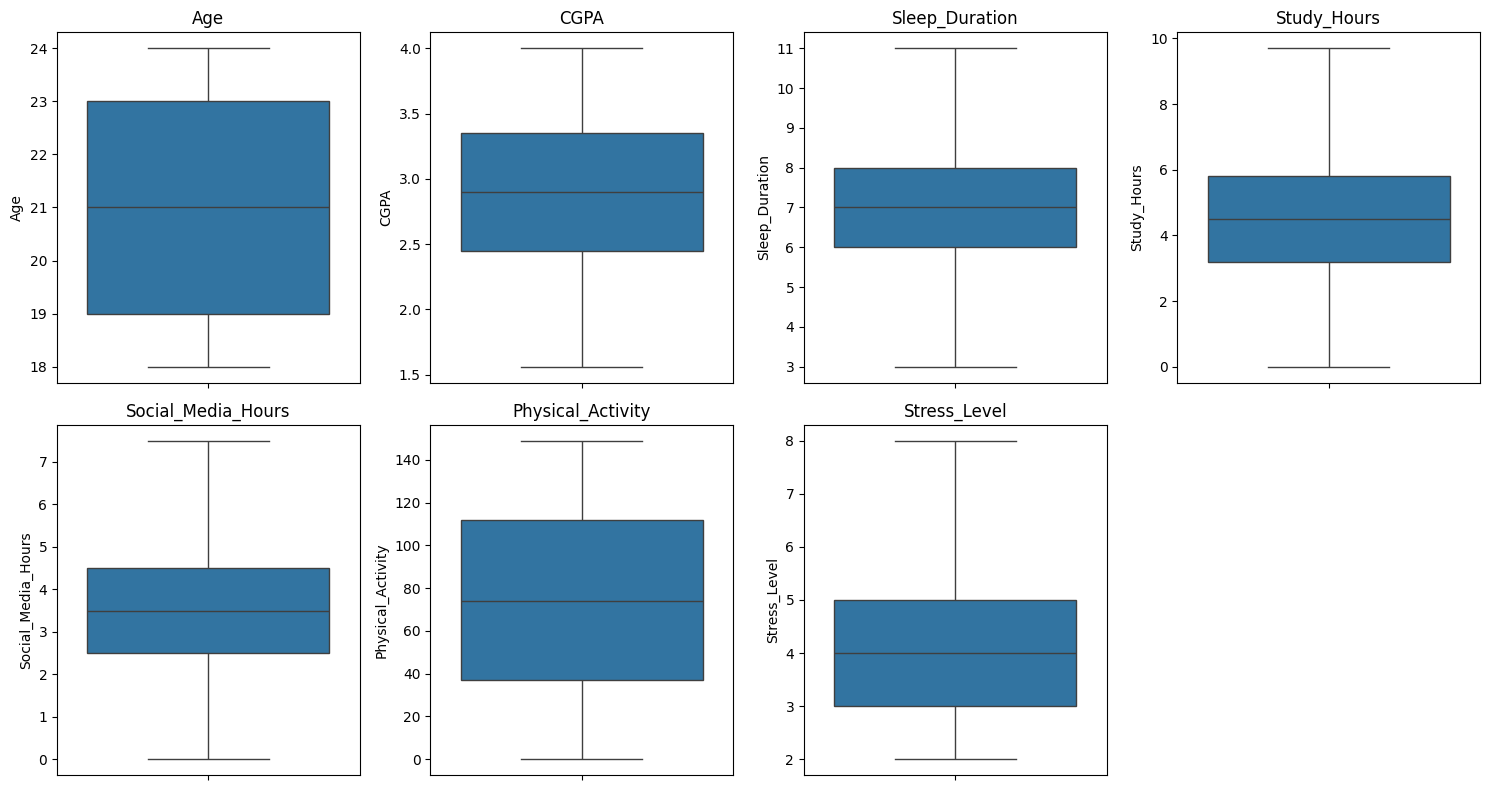

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Set figure size
plt.figure(figsize=(15, 8))

# Loop over numeric columns and plot
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 4, i)  # 2 rows, 4 columns layout
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [15]:
df.describe()

,Age,CGPA,Sleep_Duration,Study_Hours,Social_Media_Hours,Physical_Activity,Stress_Level
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,21.009010,2.898316,6.994622,4.506513,3.501589,74.353180,4.126840
std,2.000382,0.532240,1.493435,1.967261,1.481769,43.366963,1.409252
min,18.000000,1.560000,3.000000,0.000000,0.000000,0.000000,2.000000
25%,19.000000,2.450000,6.000000,3.200000,2.500000,37.000000,3.000000
50%,21.000000,2.900000,7.000000,4.500000,3.500000,74.000000,4.000000
75%,23.000000,3.350000,8.000000,5.800000,4.500000,112.000000,5.000000
max,24.000000,4.000000,11.000000,9.700000,7.500000,149.000000,8.000000
